# Conjugate Families (Part I)

### Goals 
- **Practice building Bayesian models.** You will build Bayesian models by practicing how to recognize kernels and make use of proportionality.
- **Familiarize yourself with conjugacy.** You will learn about what makes a prior conjugate and why this is a helpful property. In brief, conjugate priors make it easier to build posterior models. Conjugate priors spark joy!

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import beta, binom, gamma, uniform, poisson
from empiricaldist import Pmf

import utils as ut

### Revisiting choice of prior

How do we choose a prior? We used the flexibility of the Beta model to reflect our prior understanding of a proportion parameter π ∈ [0, 1]. There are other criteria to consider when choosing a prior model:

<div style="background-color:#e0e1e0; padding:10px; border:5px solid #737773;">
    
### Computational ease
Especially if we don't have access to computing power, it is helpful if the posterior model is easy to build.

### Interpretability
We've seen that posterior models are a compromise between the data and the prior model. A posterior model is interpretable, and thus more useful, when you can look at its formulation and identify the contribution of the data relative to that of the prior.
</div>

The Beta-Binomial has both of these criteria covered. Its calculation is easy. Once we know the $ \text{Beta}(\alpha, \beta) $ prior hyperparameters and the observed data $ Y = y $ for the $ \text{Bin}(n, \pi) $ model, the $ \text{Beta}(\alpha + y, \beta + n - y) $ posterior model follows. This posterior reflects the influence of the data, through the values of $ y $ and $ n $, relative to the prior *hyperparameters* $ \alpha $ and $ \beta $. 

If $ \alpha $ and $ \beta $ are large relative to the sample size $ n $, then the posterior will not budge that much from the prior. However, if the sample size $ n $ is large relative to $ \alpha $ and $ \beta $, then the data will take over and be more influential in the posterior model. In fact, the Beta-Binomial belongs to a larger class of prior-data combinations called **conjugate families** that enjoy both computational ease and interpretable posteriors.


<div style="background-color:#d4edda; padding:10px; border:5px solid #155724;">
    
## Conjugate prior

### We say that f(π) is a conjugate prior for L(π|y) if the posterior, f(π|y) ∝ f(π)·L(π|y), is from the same model family as the prior.

</div>

### A non-conjugate prior

To emphasize the utility (and fun!) of conjugate priors, it can be helpful to consider a *non-conjugate prior*. Let parameter $ \pi $ be a proportion between 0 and 1 and suppose we plan to collect data $ Y $ where, conditional on $ \pi $, $ Y | \pi \sim \text{Bin}(n, \pi) $. Instead of our conjugate $ \text{Beta}(\alpha, \beta) $ prior for $ \pi $, let's try out a **non-conjugate** prior with pdf $ f(\pi) $
$$
f(\pi) = e - e^\pi \quad \text{for } \pi \in [0,1].
$$

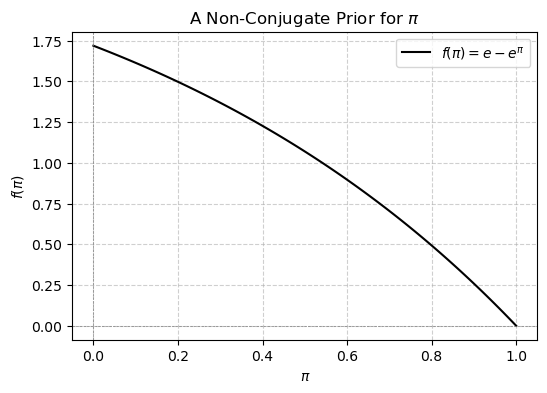

In [3]:
# Define the function f(pi) = e - e^pi
def f_pi(pi):
    return np.e - np.exp(pi)

# Generate values for pi between 0 and 1
pi_values = np.linspace(0, 1, 100)
f_values = f_pi(pi_values)

# Plot the function
plt.figure(figsize=(6, 4))
plt.plot(pi_values, f_values, label=r"$f(\pi) = e - e^\pi$", color="black")
plt.xlabel(r"$\pi$")
plt.ylabel(r"$f(\pi)$")
plt.title("A Non-Conjugate Prior for $\pi$")
plt.axhline(0, color='gray', linestyle='--', linewidth=0.5)
plt.axvline(0, color='gray', linestyle='--', linewidth=0.5)
plt.legend()
plt.grid(True, linestyle="--", alpha=0.6)

# Show the plot
plt.show()


Though *not* a Beta pdf, $ f(\pi) $ is indeed a *valid* pdf since $ f(\pi) $ is non-negative on the support of $ \pi $ and the area under the pdf is 1, i.e.,

$$
\int_0^1 f(\pi) \, d\pi = 1.
$$

Next, suppose we observe $ Y = 10 $ successes from $ n = 50 $ independent trials, all having the same probability of success $ \pi $. The resulting Binomial likelihood function of $ \pi $ is:

$$
L(\pi | y = 10) = \binom{50}{10} \pi^{10} (1 - \pi)^{40} \quad \text{for } \pi \in [0,1].
$$

$$
f(\pi | y = 10) \propto f(\pi)L(\pi | y = 10) = (e - e^\pi) \cdot \binom{50}{10} \pi^{10} (1 - \pi)^{40}.
$$

As we did previously, we will drop all constants that do not depend on $ \pi $ since we are only specifying $ f(\pi | y) $ up to a **proportionality constant**:

$$
f(\pi | y) \propto (e - e^\pi) \pi^{10} (1 - \pi)^{40}.
$$

Notice here that our non-Beta prior didn't produce a neat and clean answer for the exact posterior model (fully specified and not up to a proportionality constant).  We cannot squeeze this posterior pdf kernel into a Beta box or any other familiar model for that matter.  That is, we **cannot** rewrite $ (e - e^\pi) \pi^{10} (1 - \pi)^{40} $ so that it shares the same structure as a Beta kernel, $ \pi^{\alpha - 1} (1 - \pi)^{\beta - 1} $.  Instead, we will need to integrate this kernel in order to complete the normalizing constant, and hence the posterior specification:

$$
f(\pi | y = 10) = \frac{(e - e^\pi) \pi^{10} (1 - \pi)^{40}}
{\int_0^1 (e - e^\pi) \pi^{10} (1 - \pi)^{40} d\pi} \quad \text{for } \pi \in [0,1].
$$

This is where we really start to feel the pain of not having a conjugate prior! Since this is a particularly unpleasant integral to evaluate, and we've been trying to avoid doing any integration altogether, we will leave ourselves with that horrible expression as the final posterior.What a mess!. This is a valid posterior pdf – it's non-negative and integrates to 1 across $ \pi \in [0,1] $. But it doesn't have much else going for it. Consider a few characteristics about the posterior model that result from this particular non-conjugate prior

- The calculation for this posterior was messy and unpleasant.
- It is difficult to derive any intuition about the balance between the prior information and the data we observed from this posterior model.
- It would be dificult to specify features such as the posterior mean, mode, and standard deviation, a process which would require even more integration.

ask yourself:
#### can we us a Beta model instead of that wired function?

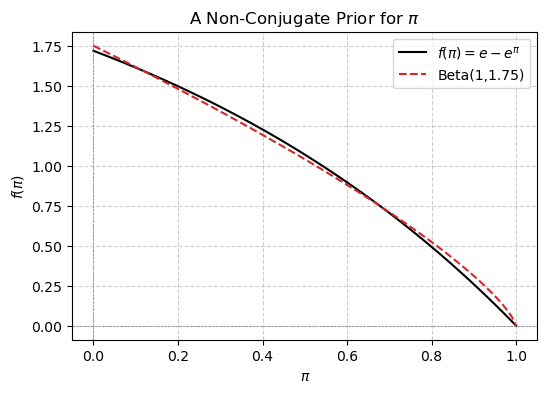

In [12]:
# Generate values for pi between 0 and 1
pi_values = np.linspace(0, 1, 100)
f_values = f_pi(pi_values)
alpha=1
beta_param = 1.75
y = beta.pdf(pi_values, alpha, beta_param)

# Plot the function
plt.figure(figsize=(6, 4))
plt.plot(pi_values, f_values, label=r"$f(\pi) = e - e^\pi$", color="black")
plt.plot(pi_values, y, '--',label=f'Beta({alpha},{beta_param})', color='tab:red')
plt.xlabel(r"$\pi$")
plt.ylabel(r"$f(\pi)$")
plt.title("A Non-Conjugate Prior for $\pi$")
plt.axhline(0, color='gray', linestyle='--', linewidth=0.5)
plt.axvline(0, color='gray', linestyle='--', linewidth=0.5)
plt.legend()
plt.grid(True, linestyle="--", alpha=0.6)

# Show the plot
plt.show()


# Fraud risk phone calls

Last year,my mum became frustrated with the number of fraud risk phone calls she was receiving daily. We set out to model the call *rate* $ \lambda $, representing the typical number of fraud risk calls received per day. **Prior** to collecting any data, we estimated that this rate was most likely around 5 calls per day but could reasonably range between 2 and 7 calls per day. To gain more insight, we decided to record the number of fraud risk phone calls on each of $ n $ sampled days, denoted as $ (Y_1, Y_2, \dots, Y_n) $.

Now, you will analyze the suitability of different modeling approaches for $ \lambda $. First, explain why $ \lambda $ does *not* fit into the familiar Beta-Binomial framework. Next, analyze why a Beta prior for $ \lambda $ is inappropriate. Additionally, consider the nature of each observed data point $ Y_i $, which represents a *count* and can take on any non-negative integer value in $ \{0, 1, 2, \dots\} $. 

## The data model

Yet before choosing a prior model structure and tuning this to match our prior understanding, it's beneficial to identify a model for the dependence of our daily phone call *count* data $ Y_i $ on the typical daily *rate* of such calls $ \lambda $. Upon identifying a reasonable data model, we can identify a prior model which can be tuned to match our prior understanding while *also* mathematically complementing the data model's corresponding likelihood function.

Keeping in mind that each data point $ Y_i $ is a *random count* that can go from 0 to a really big number, $ Y \in \{0, 1, 2, \dots\} $, the **Poisson model**, described in its general form below, makes a reasonable candidate for modeling this data.


### The Poisson model

Let discrete random variable $ Y $ be the *number of independent events* that occur in a fixed amount of time or space, where $ \lambda > 0 $ is the rate at which these events occur. Then the *dependence* of $ Y $ on **parameter** $ \lambda $ can be modeled by the Poisson. In mathematical notation:

$$
Y | \lambda \sim \text{Pois}(\lambda).
$$

Correspondingly, the Poisson model is specified by the pmf:

$$
f(y | \lambda) = \frac{\lambda^y e^{-\lambda}}{y!} \quad \text{for } y \in \{0, 1, 2, \dots\}
$$


where $ f(y | \lambda) $ sums to one across $ y $, 

$$
\sum_{y=0}^{\infty} f(y | \lambda) = 1.
$$

Further, a Poisson random variable $ Y $ has equal mean and variance,

$$
E(Y | \lambda) = \text{Var}(Y | \lambda) = \lambda.
$$


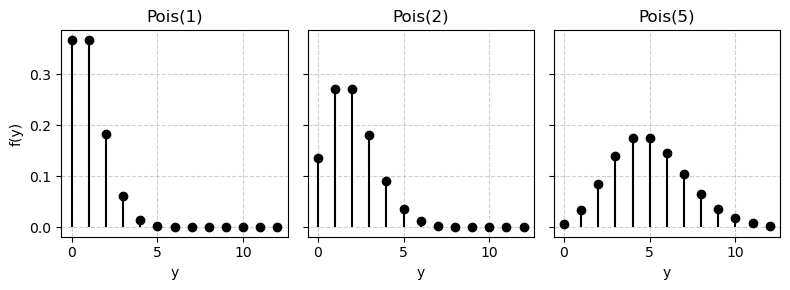

In [18]:
# Define lambda values for different Poisson distributions
lambda_values = [1, 2, 5]
y_values = np.arange(0, 13)

# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(8, 3), sharey=True)

# Generate Poisson PMF plots for each lambda
for i, lam in enumerate(lambda_values):
    poisson_pmf = poisson.pmf(y_values, lam)
    
    axes[i].stem(y_values, poisson_pmf, basefmt=" ", linefmt='black', markerfmt='ko')
    axes[i].set_title(f"Pois({lam})")
    axes[i].set_xlabel("y")
    axes[i].grid(True, linestyle="--", alpha=0.6)

axes[0].set_ylabel("f(y)")
plt.tight_layout()
plt.show()


Now, let's consider $(Y1, Y2,…, Yn)$, the number of fraud risk calls we observed on each of the $n$ days in our data collection period. Then, by assuming that the daily number of calls might differ from day to day and can be independently modeled by the Poisson, the PMF should be defined by the **joint probability**

### Joint probability mass function for a Poisson

Let $(Y_1, Y_2, \dots, Y_n)$ be an independent sample of random variables and 
$\vec{y} = (y_1, y_2, \dots, y_n)$ be the corresponding vector of observed values. Further, let $f(y_i|\lambda)$ denote the pmf of an individual observed data point $Y_i = y_i$. Then by the assumption of independence, the following **joint pmf** specifies the randomness in and plausibility of the collective sample:

\begin{align}
f(\vec{y}|\lambda) &= \prod_{i=1}^{n} f(y_i|\lambda) = f(y_1|\lambda) \cdot f(y_2|\lambda) \cdot \dots \cdot f(y_n|\lambda)\\
&=\prod_{i=1}^{n} f(y_i|\lambda) = \prod_{i=1}^{n} \frac{\lambda^{y_i} e^{-\lambda}}{y_i!}\;\; \big(\text{assuming Poisson}\big)\\
&=\frac{\lambda^{y_1} e^{-\lambda}}{y_1!} \cdot \frac{\lambda^{y_2} e^{-\lambda}}{y_2!} \cdots \frac{\lambda^{y_n} e^{-\lambda}}{y_n!}\\
&=\frac{[\lambda^{y_1} \lambda^{y_2} \dots \lambda^{y_n}][e^{-\lambda} e^{-\lambda} \dots e^{-\lambda}]}{y_1! y_2! \dots y_n!}\\
&=\frac{\lambda^{\sum y_i} e^{-n\lambda}}{\prod_{i=1}^{n} y_i!}
\end{align}

Then, once we observe actual sample data, we can flip this joint pmf on its head to define the **likelihood function** of $\lambda$. The Poisson likelihood function is equivalent in formula to the joint pmf $f(\vec{y}|\lambda)$, yet is a function of $\lambda$ which helps us assess the compatibility of different possible $\lambda$ values with our observed *collection* of sample data $\vec{y}$:

$$
L(\lambda \mid \vec{y}) = \frac{\lambda^{\sum y_i} e^{-n\lambda}}{\prod_{i=1}^{n} y_i!} \propto \lambda^{\sum y_i} e^{-n\lambda} \quad \text{for } \lambda > 0.
$$

It is convenient to represent the likelihood function up to a proportionality constant here, especially since $\prod y_i!$ will be cumbersome to calculate when $n$ is large, and what we really care about in the likelihood is $\lambda$. And when we express the likelihood up to a proportionality constant, note that the **sum of the data points** $\left(\sum y_i\right)$ and the **number of data points** $(n)$ is all the information that is required from the data. **We don't need to know the value of each individual data point $y_i$**.

## Prior?

Our original guess was that this rate is most likely around 5 calls per day, but could also reasonably range between 2 and 7 calls per day. In order to tune a prior to match these ideas about $λ$, we first have to **identify a reasonable probability model structure**.

<div style="background-color:#e6d9f3; padding: 15px; border-left: 5px solid #5c2674;">
    
❓ **Quiz Yourself!**  

Suppose we have a random sample of Poisson random variables $(Y_1, Y_2, \dots, Y_n)$ with likelihood function $L(\lambda \mid \vec{y}) \propto \lambda^{\sum y_i} e^{-n\lambda} $ for $\lambda > 0$. What do you _think_ would provide a convenient **conjugate** prior model for $\lambda$? Why?  

- **a.** A “Gamma” model with pdf $ f(\lambda) \propto \lambda^{s-1} e^{-r\lambda} $  
- **b.** A “Weibull” model with pdf $ f(\lambda) \propto \lambda^{s-1} e^{(-r\lambda)^s} $  
- **c.** A special case of the “F” model with pdf  
  $$ f(\lambda) \propto \lambda^{\frac{s}{2} -1} (1 + \lambda)^{-s} $$

</div>


####  solution

The answer is **a**. The Gamma model will provide a _conjugate_ prior for $\lambda$ when our data has a Poisson model. You might have guessed this from the section title (clever). You might also have guessed this from the shared features of the Poisson likelihood function $L(\lambda \mid \vec{y})$ (5.8) and the Gamma pdf $f(\lambda)$. Both are proportional to

$$
\lambda^{\blacksquare} e^{-\blacksquare \lambda}
$$

with differing $\blacksquare$. In fact, we'll prove that _combining_ the prior and likelihood produces a posterior pdf with this same structure. That is, the posterior will be of the same Gamma model family as the prior. First, let's learn more about the Gamma model.



### Gamma prior model

Let $\lambda$ be a continuous random variable which can take any positive value, i.e., $\lambda > 0$. Then the variability in $\lambda$ might be well modeled by a Gamma model with **shape hyperparameter** $s > 0$ and **rate hyperparameter** $r > 0$:

$$
\lambda \sim \text{Gamma}(s, r).
$$

The Gamma model is specified by the continuous pdf:

$$
f(\lambda) = \frac{r^s}{\Gamma(s)} \lambda^{s-1} e^{-r\lambda}, \quad \text{for } \lambda > 0.
$$

Further, the central tendency and variability in $\lambda$ are measured by:

$$
E(\lambda) = \frac{s}{r}
$$

$$
\text{Mode}(\lambda) = \frac{s-1}{r}, \quad \text{for } s \geq 1
$$

$$
\text{Var}(\lambda) = \frac{s}{r^2}.
$$

The **Exponential model** is a special case of the Gamma with shape $s = 1$, i.e., $\text{Gamma}(1, r)$:

$$
\lambda \sim \text{Exp}(r).
$$


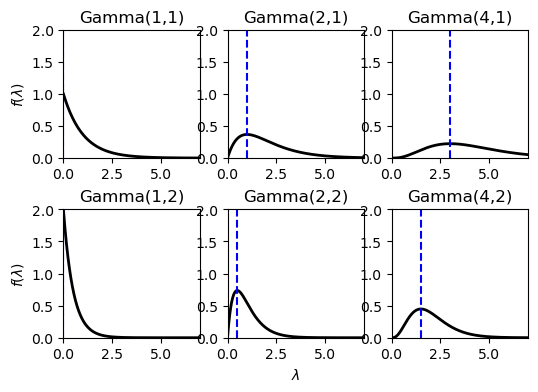

In [4]:
# Define parameter values for shape (s) and rate (r)
params = [(1,1), (2,1), (4,1), (1,2), (2,2), (4,2)]

# Set up the figure and axes
fig, axes = plt.subplots(2, 3, figsize=(6, 4))
fig.subplots_adjust(hspace=0.4)

x = np.linspace(0, 7, 1000)

for ax, (s, r) in zip(axes.flatten(), params):
    y = gamma.pdf(x, s, scale=1/r)
    ax.plot(x, y, 'k-', lw=2)
    ax.set_title(f'Gamma({s},{r})')
    ax.axvline((s-1)/r if s > 1 else 0, color='blue', linestyle='dashed')  # Mode
    ax.set_ylim(0, 2)
    ax.set_xlim(0, 7)

# Set common labels
axes[1, 1].set_xlabel('$\lambda$')
axes[0, 0].set_ylabel('$f(\lambda)$')
axes[1, 0].set_ylabel('$f(\lambda)$')

plt.show()

Now that we have some intuition for how the Gamma(s,r) model works, we can tune it to reflect our prior information about the daily rate of fraud risk phone calls λ. Recall our earlier assumption that λ is about 5, and most likely somewhere between 2 and 7. Our Gamma(s,r) prior should have similar patterns. For example, we want to pick s and r for which λ tends to be around 5.

#### Play with parameters to find a good aproximation for our prior model

In [6]:
# solution

$$ E(\lambda) = \frac{s}{r} \approx 5. $$

This can be achieved by setting $s$ to be 5 times $r$, $s = 5r$. Next, we want to make sure that most values of our Gamma$(s,r)$ prior are between 2 and 7. Through some trial and error within these constraints, and plotting various Gamma models, we find that the Gamma$(10,2)$ features closely match the central tendency _and_ variability in our prior understanding. Thus, a _reasonable_ prior model for the daily rate of fraud risk phone calls is

$$ \lambda \sim \text{Gamma}(10,2) $$

with **prior pdf** $f(\lambda)$ following from plugging $s = 10$ and $r = 2$.

$$ f(\lambda) = \frac{2^{10}}{\Gamma(10)} \lambda^{10-1} e^{-2\lambda}, \quad \text{for } \lambda > 0. $$


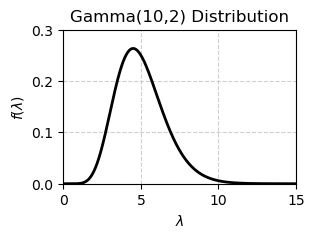

In [12]:
# Parameters for the Gamma distribution
s, r = 10, 2  # Shape (s) and rate (r)
x = np.linspace(0, 15, 1000)
y = gamma.pdf(x, s, scale=1/r)

# Create the plot
plt.figure(figsize=(3, 2))
plt.plot(x, y, 'k-', lw=2, label=f'Gamma({s},{r})')
plt.xlabel('$\lambda$')
plt.ylabel('$f(\lambda)$')
plt.title(f'Gamma({s},{r}) Distribution')
plt.ylim(0, 0.3)
plt.xlim(0, 15)
plt.grid(True, linestyle="--", alpha=0.6)

plt.show()


## A new member on this dysfunctional family: Gamma-Poisson conjugacy 

Let $\lambda > 0$ be an unknown _rate_ parameter and $(Y_1, Y_2, \dots, Y_n)$ be an independent $\text{Pois}(\lambda)$ sample. The Gamma-Poisson Bayesian model complements the Poisson structure of data $Y$ with a Gamma prior on $\lambda$:

$$
Y_i \mid \lambda \sim \text{Pois}(\lambda),\;\; \text{for the Likelihood, }L\big(\lambda\big| \vec{y}\big)
$$

$$
\lambda \sim \text{Gamma}(s, r),\;\; \text{for the Prior, } f(\lambda)
$$

Upon observing data $\vec{y} = (y_1, y_2, \dots, y_n)$, the posterior model of $\lambda$ is also a Gamma with updated parameters:

In [1]:
# solution

Let's prove this result. In general, recall that the posterior pdf of $\lambda$ is proportional to the product of the prior pdf and likelihood function defined previously, respectively:

$$
f(\lambda \mid \vec{y}) \propto f(\lambda) L(\lambda \mid \vec{y}) = \frac{r^s}{\Gamma(s)} \lambda^{s-1} e^{-r\lambda} \cdot \lambda^{\sum y_i} e^{-n\lambda} \prod y_i!^{-1}, \quad \text{for } \lambda > 0.
$$

Next, remember that any non-$\lambda$ multiplicative constant in the above equation can be “proportional-ed” out. Thus, boiling the prior pdf and likelihood function down to their kernels, we get:

$$
f(\lambda \mid \vec{y}) \propto \lambda^{s-1} e^{-r\lambda} \cdot \lambda^{\sum y_i} e^{-n\lambda}
$$

$$
= \lambda^{s + \sum y_i -1} e^{-(r+n)\lambda}
$$

where the final line follows by combining like terms. What we're left with here is the _kernel_ of the posterior pdf. This particular kernel corresponds to the pdf of a Gamma model, with shape parameter $s + \sum y_i$ and rate parameter $r + n$. Thus, we've proven that:

$$
\lambda \mid \vec{y} \sim \text{Gamma} \left( s + \sum y_i, \, r + n \right).
$$

## Fraud risk phone calls estimation with a Gamma-Poisson model

Let's apply this result to our fraud risk calls. There we have a Gamma$(10,2)$ prior for $\lambda$, the daily rate of calls. Further, on four separate days in the second week of August, we received

$$
\vec{y} = (y_1, y_2, y_3, y_4) = (6, 2, 2, 1)
$$

such calls. Thus, we have a sample of $n = 4$ data points with a **total** of 11 fraud risk calls and an **average** of 2.75 phone calls per day:

$$
\sum_{i=1}^{4} y_i = 6 + 2 + 2 + 1 = 11
\quad \text{and} \quad
\frac{\sum_{i=1}^{4} y_i}{4} = 2.75.
$$

The resulting Poisson likelihood function of $\lambda$ is:

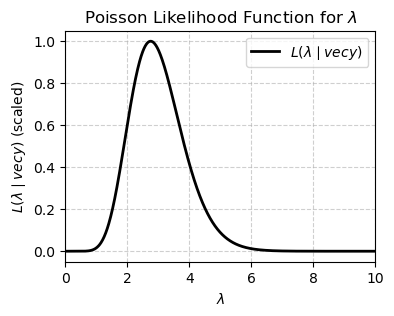

In [18]:
# solution
# Define parameters
total_calls = 11  # Sum of y_i
n_days = 4  # Number of data points
lambda_values = np.linspace(0, 10, 1000)

# Compute the Poisson likelihood (up to a proportionality constant)
likelihood = (lambda_values ** total_calls) * np.exp(-n_days * lambda_values)
likelihood /= np.max(likelihood)  # Normalize for visualization

# Create the plot
plt.figure(figsize=(4, 3))
plt.plot(lambda_values, likelihood, 'k-', lw=2, label=r'$L(\lambda \mid vec{y})$')
plt.xlabel(r'$\lambda$')
plt.ylabel(r'$L(\lambda \mid vec{y})$ (scaled)')
plt.title(r'Poisson Likelihood Function for $\lambda$')
plt.xlim(0, 10)
plt.grid(True, linestyle="--", alpha=0.6)
plt.legend()

plt.show()

$$L(\lambda \mid \vec{y}) = \frac{\lambda^{11} e^{-4\lambda}}{6! \times 2! \times 2! \times 1!} \propto \lambda^{11} e^{-4\lambda}, \quad \text{for } \lambda > 0.$$

Combining these observations with our Gamma$(10,2)$ prior model of $\lambda$, it follows that the posterior model of $\lambda$ is a Gamma with an updated shape parameter of 21 $\left(s + \sum y_i = 10 + 11 \right)$ and rate parameter of 6 $\left(r + n = 2 + 4\right)$:

$$
\lambda \mid \vec{y} \sim \text{Gamma}(21,6).
$$

We can visualize the prior pdf, scaled likelihood function, and posterior pdf for $\lambda$ all in a single plot.

[0.00000000e+00 7.39453924e-26 1.48321507e-22 ... 4.83406900e-11
 4.75541818e-11 4.67803877e-11]


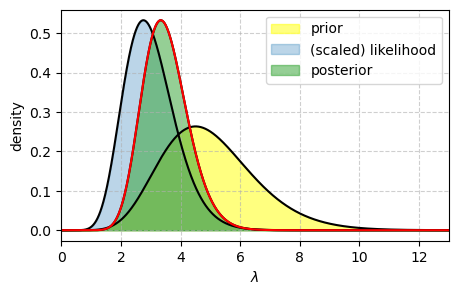

In [66]:
# solution
# Define parameters
prior_s, prior_r = 10, 2
total_calls, n_days = 11, 4
posterior_s, posterior_r = 21, 6

# Define x range
N=2500
x_lim = 13
x = np.linspace(0, x_lim, N)

# Compute densities
prior_pdf = gamma.pdf(x, prior_s, scale=1/prior_r)
likelihood_pdf = (x ** total_calls) * np.exp(-n_days * x)
print(likelihood_pdf)
posterior_mult = Pmf(prior_pdf*likelihood_pdf)
posterior_mult.normalize()
posterior_pdf = gamma.pdf(x, posterior_s, scale=1/posterior_r)

# Normalize likelihood for visualization
likelihood_pdf /= np.max(likelihood_pdf)
likelihood_pdf *= np.max(posterior_pdf)
posterior_mult *= np.max(posterior_pdf)/posterior_mult.max()

# Create plot
plt.figure(figsize=(5, 3))
plt.plot(x, prior_pdf, color='black')
plt.plot(x, likelihood_pdf, color='black')
plt.plot(x, posterior_pdf, color='black')
plt.plot(x, posterior_mult, color='red')
plt.fill_between(x, prior_pdf, color='yellow', alpha=0.5, label='prior')
plt.fill_between(x, likelihood_pdf, color='tab:blue', alpha=0.3, label='(scaled) likelihood')
plt.fill_between(x, posterior_pdf, color='tab:green', alpha=0.5, label='posterior')

# Labels and legend
plt.xlabel('$\lambda$')
plt.ylabel('density')
plt.xlim(0, x_lim)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

<div style="background-color:#e6d9f3; padding: 15px; border-left: 5px solid #5c2674;">
    
❓ **Quiz Yourself!**  

Calculate the argmax of your posterior. Is it the same as the $E\big(\lambda,\big|\vec{y}\big)$? Why?

</div>


In [68]:
print(posterior_pdf.argmax()/N*x_lim)
print(21/6)
posterior_pdf.argmax()/N*x_lim == 21/6

False

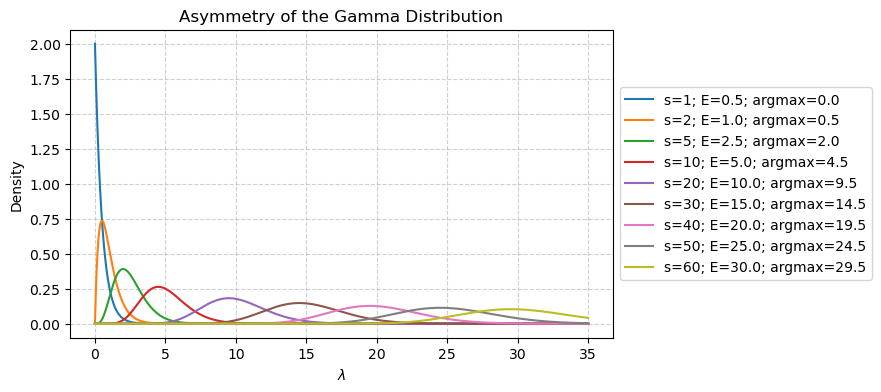

In [89]:
# Define different shape parameters to illustrate asymmetry
shape_params = [1, 2, 5, 10, 20, 30, 40, 50, 60]
r = 2  # Fix the scale parameter
x_lim = 35
N = 15000
x = np.linspace(0, x_lim, N)

# Create plot
plt.figure(figsize=(7, 4))
for shape in shape_params:
    y = gamma.pdf(x, shape, scale=1/r)
    plt.plot(x, y, label=f's={shape}; E={shape/r}; argmax={np.round(y.argmax()/N*x_lim,2)}')

# Labels and legend
plt.xlabel('$\lambda$')
plt.ylabel('Density')
plt.title('Asymmetry of the Gamma Distribution')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

#### Understanding the Asymmetry of the Gamma Distribution

The Gamma distribution is often used to model positive continuous data, such as waiting times or rates. One key characteristic of the Gamma distribution is its **asymmetry**, which depends on the shape parameter $s$:

- When $s = 1$, the Gamma distribution reduces to the Exponential distribution, which is **highly skewed** to the right.
- As $s$ increases, the distribution becomes **less skewed**, and for large $s$, it **approximates a Normal distribution**.
- The **mode shifts to the right** as $s$ increases, and the distribution flattens out.

In the figure, we visualize Gamma distributions with different shape parameters to illustrate how the asymmetry changes with $s$. Notice that for small $s$, the distribution is highly skewed, whereas for **larger $s$, it becomes more symmetric**.


# Exercises

**Exercise 1** (Text messages)
Let random variable $\lambda$ represent the rate of text messages people receive in an hour. At first, you believe that the typical number of messages per hour is **5** with a standard deviation of **0.25** messages.

- a) Tune and plot an appropriate Gamma$(s,r)$ prior model for $\lambda$.  
- b) What is the prior probability that the rate of text messages per hour is larger than **10**?

**Exercise 2** (Text messages with data)
Continuing with **Exercise 1**, you collect data from six friends. They received **7, 3, 8, 9, 10, 12** text messages in the previous hour.

- a) Plot the resulting likelihood function of $\lambda$.  
- b) Plot the prior pdf, likelihood function, and the posterior pdf of $\lambda$. 
- c) Comment on how your understanding about $\lambda$ changed from the prior (in the previous exercise) to the posterior based on the data you collected from your friends.

**Exercise 3 - Important** (World Cup)
Let $\lambda$ be the average number of goals scored in a Women's World Cup game. We'll analyze $\lambda$ by the following Gamma-Poisson model where data $Y_i$ is the observed number of goals scored in a sample of World Cup games:

$$
Y_i \mid \lambda \sim \text{Pois}(\lambda)
$$

$$
\lambda \sim \text{Gamma}(s, r)
$$

- a) Why is the Poisson model a reasonable choice for our data $Y_i$?  
- b) Propose a prior model to represent our understanding of $\lambda$. Justify your choice by explaining the selected parameters and their relevance.
- c) The wwc_2019_matches dataset is available in the file "World_Cup_Matches.csv". Use this dataset to construct a posterior model for the number of goals scored. Explore different approaches by:

    - Analyzing the observed data in groups of 5, 10, and 15 matches and show the evolution of your posterior distribution.
    - Considering all the data together as a single dataset.

In [9]:
csv_file_path = "World_cup_matches.csv"  # Ensure the correct file path

# Load the CSV file into a pandas DataFrame
df = pd.read_csv(csv_file_path)

# Display the first few rows of the DataFrame
df.head()

,date,league,team1,team2,score1,score2
0,07/06/2019,FIFA Women's World Cup Final,France Women,South Korea Women,4,0
1,08/06/2019,FIFA Women's World Cup Final,Germany Women,China Women,1,0
2,08/06/2019,FIFA Women's World Cup Final,Spain Women,South Africa Women,3,1
3,08/06/2019,FIFA Women's World Cup Final,Norway Women,Nigeria Women,3,0
4,09/06/2019,FIFA Women's World Cup Final,Australia Women,Italy Women,1,2
